In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [2]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [3]:
data['Time'] = pd.to_datetime(data['Time'])

In [4]:
data.set_index('Time', inplace=True)

In [5]:
data.drop(columns=['ESI 3', 'ESI 1', 'ESI 4', 'ESI 5'], inplace=True)

In [6]:
esi1_daily = data['ESI 2'].resample('D').sum()

In [7]:
esi1_daily_df = esi1_daily.reset_index()

In [8]:
esi1_daily_df.columns = ['Date', 'ESI 2']

In [9]:
print(esi1_daily_df)

           Date  ESI 2
0    2017-01-01     38
1    2017-01-02     31
2    2017-01-03     42
3    2017-01-04     38
4    2017-01-05     42
...         ...    ...
1456 2020-12-27     63
1457 2020-12-28     82
1458 2020-12-29     66
1459 2020-12-30     56
1460 2020-12-31     48

[1461 rows x 2 columns]


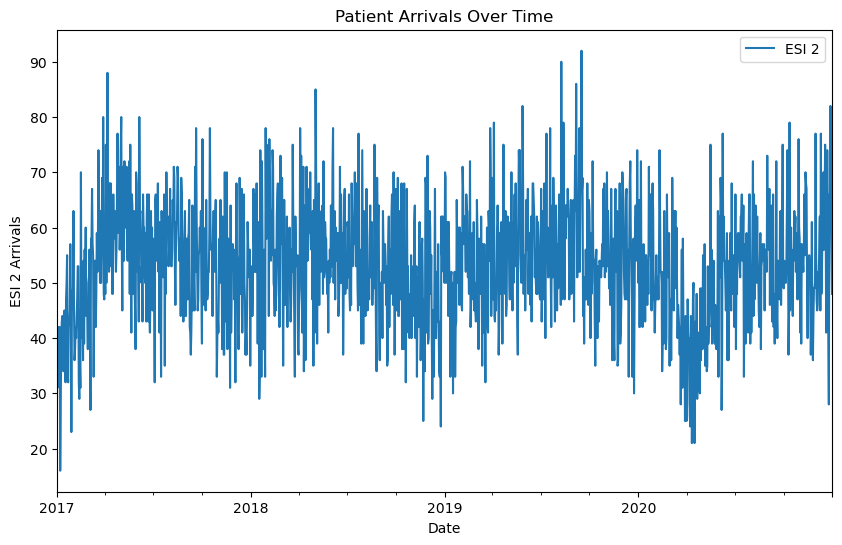

In [10]:
esi1_daily_df.plot(x='Date', y='ESI 2', figsize=(10, 6))
plt.title('Patient Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('ESI 2 Arrivals')
plt.show()

In [11]:
train_size = int(len(esi1_daily_df) * 0.9) 
train, test = esi1_daily_df.iloc[:train_size], esi1_daily_df.iloc[train_size:]

In [12]:
model = auto_arima(train['ESI 2'], seasonal=True, m=7,
                   start_p=1, start_q=1, start_P=1, start_Q=1,
                   max_p=5, max_q=5, max_P=5, max_Q=5,
                   d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=10588.003, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=10240.807, Time=0.33 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=9801.147, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=10586.006, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=9842.261, Time=0.15 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=9776.588, Time=0.82 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=2.91 sec
 ARIMA(0,1,1)(0,0,3)[7] intercept   : AIC=9760.971, Time=1.69 sec
 ARIMA(0,1,1)(1,0,3)[7] intercept   : AIC=inf, Time=4.67 sec
 ARIMA(0,1,1)(0,0,4)[7] intercept   : AIC=9746.452, Time=3.49 sec
 ARIMA(0,1,1)(1,0,4)[7] intercept   : AIC=inf, Time=8.15 sec
 ARIMA(0,1,1)(0,0,5)[7] intercept   : AIC=9743.923, Time=5.21 sec
 ARIMA(0,1,1)(1,0,5)[7] intercept   : AIC=inf, Time=13.

In [13]:
n_periods = len(test)
forecast_values = model.predict(n_periods=n_periods)

In [14]:
print("Forecasted values:")
print(forecast_values)

Forecasted values:
1314    54.238658
1315    50.806834
1316    50.101026
1317    58.631381
1318    56.931879
          ...    
1456    56.200920
1457    62.005266
1458    59.987766
1459    58.405415
1460    59.569458
Length: 147, dtype: float64


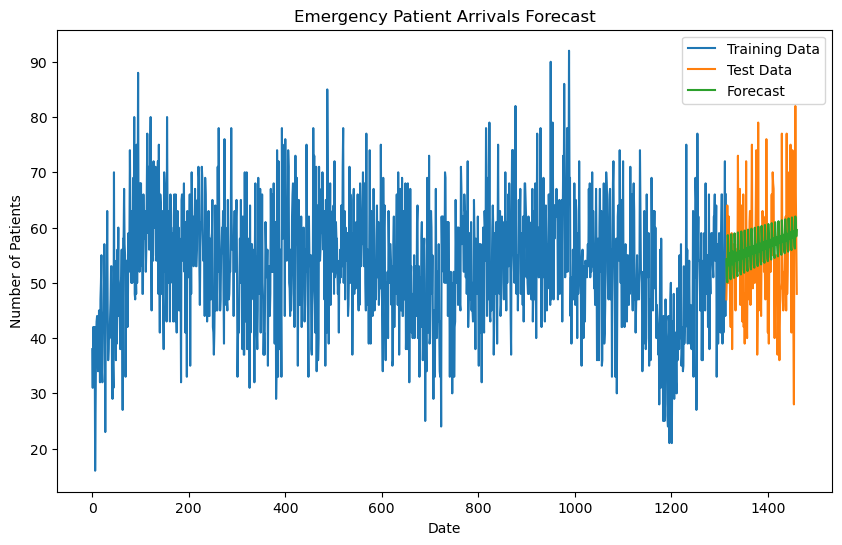

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ESI 2'], label='Training Data')
plt.plot(test.index, test['ESI 2'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast')
plt.title('Emergency Patient Arrivals Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [16]:
def mean_absolute_percentage_error(actual, forecast):
  
   
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [17]:
mape = mean_absolute_percentage_error(test['ESI 2'], forecast_values)
print("MAPE:", mape)

MAPE: 15.30439727365501


In [18]:
def root_mean_squared_error(actual, forecast):
    
    actual, forecast = np.array(actual), np.array(forecast)
    return np.sqrt(np.mean((actual - forecast) ** 2))

In [19]:
rmse = root_mean_squared_error(test['ESI 2'], forecast_values)
print("RMSE:", rmse)

RMSE: 9.593271040006025


In [20]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['ESI 2'], forecast_values)
print("MAE:", mae)

MAE: 7.778819776833293
